# **TAREA N° 1**
aprendizaje estadístico, regresión lineal

Curso:          Machine Learning para Macroeconomía y Finanzas  
Profesor:       Josue Cox   

- Fecha y hora de entrega: Miércoles 24 de enero, 11:59pm   
- Nombres de integrantes del trabajo: **Emanuel Rojas** y **Joshua Quispe**

## EJERCICIOS TEÓRICOS

1. (2 puntos)  Para los siguientes enunciados, indique si se esperaría un mejor o peor desempeño (en términos del trade-off de varianza y sesgo) de un método de aprendizaje estadístico más flexible o menos flexible
- 1.a. El tamaño de la muestra es grande y el número de predictores es pequeño
- 1.b. El tamaño de predictores es grande y el tamaño de la muestra es grande
- 1.c. La relación entre los predictores y la variable de respuesta es no-lineal
- 1.d. La varianza del término de error, $\sigma^{2}=Var(\varepsilon)$ es bastante alta

In [1]:
# 1.a. El tamaño de la muestra es grande y el número de predictores es pequeño

"""
Un método de aprendizaje estadístico más flexible es más probable que produzca 
estimaciones precisas de la relación entre variables, incluso si los datos de 
entrenamiento no son representativos de los datos reales
"""


'\nUn método de aprendizaje estadístico más flexible es más probable que produzca \nestimaciones precisas de la relación entre variables, incluso si los datos de \nentrenamiento no son representativos de los datos reales\n'

In [2]:
# 1.b. El tamaño de predictores es grande y el tamaño de la muestra es grande
"""
En este caso, se espera un mejor desempeño de un método de
aprendizaje estadístico menos flexible que uno más flexible.
Un método de aprendizaje estadístico menos flexible es más probable
que produzca estimaciones precisas de la relación entre variables, incluso 
si los datos de entrenamiento no son representativos de los datos reales.
"""

'\nEn este caso, se espera un mejor desempeño de un método de\naprendizaje estadístico menos flexible que uno más flexible.\nUn método de aprendizaje estadístico menos flexible es más probable\nque produzca estimaciones precisas de la relación entre variables, incluso \nsi los datos de entrenamiento no son representativos de los datos reales.\n'

In [3]:
# 1.c. La relación entre los predictores y la variable de respuesta es no-lineal
"""
Se espera un mejor desempeño de un método de aprendizaje estadístico más flexible
si la relación entre los predictores y la variable de rpta es no-lineal, debido 
a un m+etodo de aprendizaje estadístico más flexible posee más capacidad para capturar 
relaciones no lineales entre las variables.
"""

'\nSe espera un mejor desempeño de un método de aprendizaje estadístico más flexible\nsi la relación entre los predictores y la variable de rpta es no-lineal, debido \na un m+etodo de aprendizaje estadístico más flexible posee más capacidad para capturar \nrelaciones no lineales entre las variables.\n'

In [4]:
# 1.d. La varianza del término de error es bastante alta
"""
Se espera un mejor desempeño de un método de aprendizaje estadístico menos 
flexible si la varianza del término de error es bastante alta, debido a que
un método de aprendizaje estadístico menos flexible es menos susceptible
a los efectos de la varianza del término de error
"""

'\nSe espera un mejor desempeño de un método de aprendizaje estadístico menos \nflexible si la varianza del término de error es bastante alta, debido a que\nun método de aprendizaje estadístico menos flexible es menos susceptible\na los efectos de la varianza del término de error\n'

2. (2 puntos)  Grafique en una sola figura (puede usar cualquier editor de gráficos, ppt, o cualquier otro programa que prefieran) cinco curvas para un problema en donde el MSE se minimiza con una flexibilidad media:
- Sesgo al cuadrado
- Varianza
- MSE en el conjunto de datos de entretenimiento
- MSE en el conjunto de datos de prueba
- El error irreducible

En el eje-x debe de estar la flexibilidad y en el eje-y, los valores de cada una de estas curvas

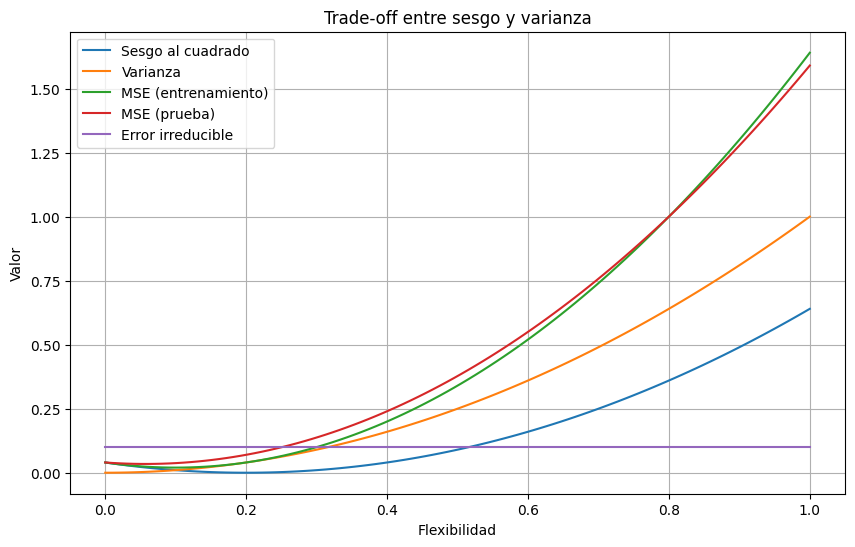

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

flexibilidad = np.linspace(0, 1, 100)

sesgo_cuadrado = (0.2 - flexibilidad)**2
varianza = flexibilidad**2
mse_entrenamiento = sesgo_cuadrado + varianza
mse_prueba = (0.2 - flexibilidad/2)**2 + 1.5*varianza
error_irreducible = np.full_like(flexibilidad, 0.1)

plt.figure(figsize=(10, 6))
plt.plot(flexibilidad, sesgo_cuadrado, label='Sesgo al cuadrado')
plt.plot(flexibilidad, varianza, label='Varianza')
plt.plot(flexibilidad, mse_entrenamiento, label='MSE (entrenamiento)')
plt.plot(flexibilidad, mse_prueba, label='MSE (prueba)')
plt.plot(flexibilidad, error_irreducible, label='Error irreducible')

plt.xlabel('Flexibilidad')
plt.ylabel('Valor')
plt.title('Trade-off entre sesgo y varianza')
plt.legend()
plt.grid(True)
plt.show()

3. (3 puntos)  : En esta pregunta entenderemos de forma simple cómo funciona el método de aproximación de K-vecinos-cercanos (KNN) en un entorno de clasificación. Tenemos seis observaciones de una muestra donde hay cuatro predictores y una variable de respuesta cualitativa (si el individuo está desempleado o no)

| Obs. | Edad | Educación | Propietario Casa | Núm. hijos | Estado Laboral |
| :---  | :----: | :----: | :----: | :----: |  ---: |
|   1   |   18   |   1    |   0    |   0    |Empleado|
|   2   |   25   |   2    |   0    |   1    |Empleado|
|   3   |   36   |   2    |   0    |   2    |Desempleado|
|   4   |   45   |   3    |   1    |   2    |Empleado|
|   5   |   50   |   1    |   0    |   0    |Empleado|
|   6   |   60   |   3    |   1    |   4    |Desempleado|

Donde educación toma valor 1 si el individuo solo fue a primaria, toma valor 2 si fue a secundaria y toma valor 3 si tiene educación superior. La variable propietario casa toma el valor 0 si la persona no posee una casa (alquila) o valor 1 si es propietaria.
Queremos saber si un individuo con 48 años, nivel educativo superior, que posee una casa y tiene 3 hijos tendrá más probabilidad de estar desempleado o empleado.

- a. Encuentra la distancia euclidiana[^1] de cada observación con respecto al individuo que queremos considerar.

- b. ¿Cuál es la predicción si usamos un KKN con K=1? ¿Por qué?

- c. ¿Cuál es la predicción si usamos un KKN con K=3? ¿Por qué?

[^1]: La distancia euclidiana entre dos vectores $x, y \in R^{4}$ se define como $(d(x, y)=(x_{1}-y_{1})^2+...+(x_{4}-y_{4})^2)$




In [30]:
#Solución

#a) Coordenadas de nuestro individuo: (48, 3, 1, 3)

data_ex3 = np.array([[18, 1, 0, 0, 'Empleado'], 
                    [25, 2, 0, 1, 'Empleado'], 
                    [36, 2, 0, 2, 'Desempleado'], 
                    [45, 3, 1, 2, 'Empleado'], 
                    [50, 1, 0, 0, 'Empleado'], 
                    [60, 3, 1, 4, 'Desempleado'],])

individuo1 = np.array([48, 3, 1, 3])




In [31]:
def dist_euclidiana(x, y):
    return ((x-y)**2).sum()

distancias = []
for observacion in data_ex3:
    distancias.append(dist_euclidiana(individuo1, observacion[:-1]))

print(distancias)

UFuncTypeError: ufunc 'subtract' did not contain a loop with signature matching types (dtype('int32'), dtype('<U11')) -> None

4. (3 puntos)  Supongamos que tenemos una muestra con 5 predictores. X1 es la nota promedio del estudiante, X2 es el resultado de un test que mide el IQ del estudiante, X3 es el nivel educativo (1 es universitario y 0 es secundario), X4 es una interacción entre X1 y X2, X5 es una interacción entre X1 y X3. La variable de interés es el salario después de terminar la universidad en miles de soles. Tenemos los resultados al estimar un modelo con MCO:

$$\widehat{\beta}_{0} = 50, \widehat{\beta}_{1} = 20, \widehat{\beta}_{2} = 0.07, \widehat{\beta}_{3} = 35, \widehat{\beta}_{4} = 0.01, \widehat{\beta}_{5} = -10$$

* a. ¿Qué respuesta es verdadera? ¿Y por qué?

    * i. Para un nivel dado de IQ y de notas, los graduados de secundaria ganan más, en promedio, que los graduados universitarios
    * ii. Para un nivel dado de IQ y de notas, los graduados universitarios ganan más, en promedio, que los graduados de secundaria
    * iii. Para un nivel dado de IQ y de notas, los graduados de secundaria ganan más, en promedio, que los graduados universitarios siempre que sus notas son mayores
    * iv. Para un nivel dado de IQ y de notas, los graduados universitarios ganan más, en promedio, que los graduados de secundaria siempre que sus notas son mayores
* b. Predecir el salario de un graduado universitario con un IQ de 110 y un nivel de notas de 4.0
* c. Diga si es cierto que como el coeficiente de la interacción entre notas e IQ es pequeño, existe poca evidencia de algún efecto de dicha interacción

In [7]:
#Solución
# a. La respuesta correcta es ii. Para un nivel dado de IQ y de notas, los graduados universitarios ganan más, en promedio,
# que los graduados de secundaria. Esto se debe a que el coeficiente para X3 (nivel educativo) es positivo (βˆ3=35), lo que indica que,
#manteniendo todo lo demás constante, los graduados universitarios (X3=1) ganan en promedio 35,000 soles más que los graduados de secundaria (X3=0).

In [8]:
# b.
beta0 = 50
beta1 = 20
beta2 = 0.07
beta3 = 35
beta4 = 0.01
beta5 = -10

X1 = 4.0
X2 = 110
X3 = 1

Y_hat = beta0 + beta1*X1 + beta2*X2 + beta3*X3 + beta4*X1*X2 + beta5*X1*X3

print(f"El salario predicho es {Y_hat} miles de soles.")

El salario predicho es 137.1 miles de soles.


In [9]:
# c. No necesariamente. Aunque el coeficiente de la interacción entre las notas y el IQ (βˆ4=0.01) es pequeño,
# esto no significa que no haya evidencia de algún efecto de dicha interacción. El tamaño del coeficiente en sí mismo no
# es un indicador de la importancia o significancia de una variable. Para determinar si hay evidencia de un efecto de interacción,
# deberíamos realizar una prueba de hipótesis para el coeficiente de interacción.

## EJERCICIOS PRÁCTICOS

6. (5 puntos)  Usando la API del Banco Central de Reserva del Perú, construya una base de datos (Pandas) con las siguientes variables para cada frecuencia de datos. Genere gráficos para cada una de ellas (Tip: pueden usar un for loop para generar los gráficos).

* _Frecuencia Diaria_:

    * 1.Tasa interbancaria (S/.)
    * 2.Rendimiento del Bono del gobierno peruano a 10 años (en S/)
    * 3.TC Interbancario (S/ por US$) – Compra
    * 4.TC Interbancario (S/ por US$) – Venta
    * 5.TC Euro (S/ por Euro) – Compra
    * 6.TC Euro (S/ por Euro) – Venta
    * 7.Índice General Bursátil BVL (índice)
    * 8.Índice Selectivo Bursátil BVL (índice)
    * 9.Monto negociado en acciones (millones S/) - Promedio diario
    * 10.Cobre (Londres, cUS$ por libras)
    * 11.Plata (H.Harman, US$ por onzas troy)
    * 12.Zinc (Londres, cUS$ por libras)
    * 13.Oro (Londres, US$ por onzas troy)
    * 14.Petróleo (West Texas Intermediate, US$ por barriles)
    * 15.Bonos del Tesoro EE.UU. - 5 años (%)
    * 16.Bonos del Tesoro EE.UU. - 10 años (%)
    * 17.Bonos del Tesoro EE.UU. - 30 años (%)
    * 18.Spread - EMBIG Perú (pbs)
    * 19.Spread - EMBIG América Latina (pbs)
    * 20.Dow Jones (var%)

* _Frecuencia Mensual_:

    * 1.Exportaciones totales (Valores FOB en millones de US$)
    * 2.Importaciones totales (Valores FOB en millones de US$)
    * 3.Circulante (millones S/.)
    * 4.Preferencia por Circulante (millones S/.)
    * 5.Indicador de las empresas bancarias - Utilidad acumulada - Empresas Bancarias (millones S/.)
    * 6.Liquidez de las empresas bancarias - Liquidez (millones S/.)
    * 7.Liquidez de las empresas bancarias - Coeficiente de Dolarización de la Liquidez (%)
    * 8.Índice de Precios al Consumidor (var% mensual)
    * 9.índice de Precios al Consumidor Sin Alimentos y Energía (var% mensual)
    * 10.índice de Precios al Consumidor Alimentos y Energía (var% mensual)
    * 11.índice de Precios al Consumidor Subyacente (var% mensual)
    * 12.Índice de Precios al Consumidor No Subyacente (var% mensual)
    * 13.índice de Precios al por Mayor (var% mensual)
    * 14.Expectativa de Inflación a 12 meses
    * 15.Expectativa de PBI a 12 meses
    * 16.Expectativa de TC a 12 meses
    * 17.Producto bruto interno (índice 2007=100)
    * 18.Producto bruto interno (variaciones porcentuales anualizadas)

* _Frecuencia Trimestral_:

    * 1._Índice de precio hedónicos de inmuebles_
    * 2._Términos de Intercambio (2007=100)_
    * 3._Producto bruto interno (índice 2007=100)_
    * 4._Demanda Interna - Consumo Privado (millones 2007)_
    * 5._Demanda Interna - Consumo Público (millones 2007)_
    * 6._Demanda Interna - Inversión Bruta Interna (millones 2007)_
    * 7._Demanda Interna - Exportaciones_
    * 8._Demanda Interna - Importaciones (millones 2007)_
    * 9._Venta de energía eléctrica total (gwh)_
    * 10._Producción de energía eléctrica total (gwh)_


In [10]:
#Solución

7. (5 puntos)  Para esta pregunta usará la base de datos (“AsientoBebe”). Esta base de datos contiene datos de ventas de asientos para bebes para carros en 400 mercados. Entre los predictores que tenemos en la base de datos se enumeran: (i) el precio promedio de la competencia [CompPrice], (ii) el ingreso promedio en miles el mercado o localidad [Income], (iii) el gasto en publicidad en cientos [Advertising], (iv) el número de personas en el mercado en miles [Population], (v) el precio de venta en dólares [Price], (vi) si la localidad o mercado es urbana o no [Urban], (vii) si el asiento se produce o no en los EEUU [US], entre otros.

- 1.Estime un modelo de regresión múltiple para predecir las ventas [Sales] usando Price, Urban y US
- 2.Dé una interpretación de cada uno de los coeficientes del modelo teniendo en cuenta que hay variables cualitativas
- 3.¿Para cuáles predictores se puede rechazar la hipótesis nula de que $H_{0}:\beta_{j}=0$?
- 4.Estime un nuevo modelo usando solo las variables en la que los predictores tengan una asociación significativa con las ventas
- 5.¿Qué tan bien los modelos en (1) y (4) ajustan los datos en términos de R_{adj}^{2}?
- 6.Divida la muestra en una de entrenamiento y una de prueba o control. Estime los modelos en (1) y (4) y presente el MSE en la muestra de entrenamiento y prueba. ¿Cuál modelo usted eligiría?

In [12]:
ruta_al_archivo = '/content/AsientoBebe.csv'
#ruta_al_archivo = '../machine-learning-for-macroeconomics/AsientoBebe.csv'

df = pd.read_csv(ruta_al_archivo)


print(df.head())

   Sales  CompPrice  Income  Advertising  Population  Price ShelveLoc  Age  \
0   9.50        138      73           11         276    120       Bad   42   
1  11.22        111      48           16         260     83      Good   65   
2  10.06        113      35           10         269     80    Medium   59   
3   7.40        117     100            4         466     97    Medium   55   
4   4.15        141      64            3         340    128       Bad   38   

   Education Urban   US  
0         17   Yes  Yes  
1         10   Yes  Yes  
2         12   Yes  Yes  
3         14   Yes  Yes  
4         13   Yes   No  


In [24]:
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

df['Urban'] = df['Urban'].apply(lambda x: 1 if x == 'Yes' else 0)
df['US'] = df['US'].apply(lambda x: 1 if x == 'Yes' else 0)

X = df[['Price', 'Urban', 'US']]
y = df['Sales']

X = sm.add_constant(X)

model = sm.OLS(y, X)
results = model.fit()

print(results.summary())

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model_train = sm.OLS(y_train, X_train)
results_train = model_train.fit()

y_train_pred = results_train.predict(X_train)
y_test_pred = results_train.predict(X_test)

mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

print(f'MSE en el conjunto de entrenamiento: {mse_train}')
print(f'MSE en el conjunto de prueba: {mse_test}')

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.234
Method:                 Least Squares   F-statistic:                     41.52
Date:                Tue, 23 Jan 2024   Prob (F-statistic):           2.39e-23
Time:                        19:58:49   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1863.
Df Residuals:                     396   BIC:                             1879.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.0435      0.651     20.036      0.0

In [25]:
# const: Este es el valor esperado de las ventas cuando todas las demás variables son 0. En este caso, si el precio es 0,
# y las variables ‘Urban’ y ‘US’ son 0 (es decir, el mercado no es urbano y el asiento no se produce en los EE. UU.),
# las ventas esperadas serían de 13.0435 (en la escala de las ventas).

# Price: Este coeficiente indica que por cada aumento de una unidad en el precio, las ventas disminuyen en promedio en
# 0.0545 unidades (manteniendo constantes las demás variables). Esto tiene sentido ya que generalmente esperaríamos que a
# medida que el precio de un producto aumenta, las ventas disminuirían.

#Urban: Esta es una variable categórica que indica si el mercado es urbano (1) o no (0). El coeficiente de -0.0219 sugiere que,
# en promedio, las ventas son ligeramente menores en los mercados urbanos en comparación con los no urbanos, manteniendo constantes
# las demás variables. Sin embargo, el valor p asociado a este coeficiente es muy alto (0.936), lo que sugiere que este efecto no es
# estadísticamente significativo.

# US: Esta es una variable categórica que indica si el asiento se produce en los EE. UU. (1) o no (0). El coeficiente de 1.2006 sugiere que,
# en promedio, las ventas son mayores para los asientos producidos en los EE. UU. en comparación con los que no se producen en los EE. UU., manteniendo
# constantes las demás variables. El valor p asociado a este coeficiente es muy bajo (menor que 0.05), lo que sugiere que este efecto es
# estadísticamente significativo.

In [26]:
# Se rechaza todos menos urban pues no es significativo

In [27]:
X = df[['Price', 'US']]
y = df['Sales']

X = sm.add_constant(X)

model = sm.OLS(y, X)
results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.235
Method:                 Least Squares   F-statistic:                     62.43
Date:                Tue, 23 Jan 2024   Prob (F-statistic):           2.66e-24
Time:                        19:58:49   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1861.
Df Residuals:                     397   BIC:                             1873.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.0308      0.631     20.652      0.0

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model_train = sm.OLS(y_train, X_train)
results_train = model_train.fit()

y_train_pred = results_train.predict(X_train)
y_test_pred = results_train.predict(X_test)

mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

print(f'MSE en el conjunto de entrenamiento: {mse_train}')
print(f'MSE en el conjunto de prueba: {mse_test}')

MSE en el conjunto de entrenamiento: 5.6384495071889456
MSE en el conjunto de prueba: 7.757408061516367


In [29]:
# Se elige en función de que se tenga el menor MSE en el conjunto de prueba